In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import xarray as xr
import geoviews as gv

# Parámetros de mapas
gv.extension("matplotlib")
# Coloca la barra de color horizontal y abajo
def hook(plot, element):
    cax = plot.handles["cax"]
    ax = plot.handles["axis"]
    bbox = ax.get_position()
    l, b, w, h = bbox.x0, bbox.y0, bbox.width, bbox.height
    cax.set_position([l, 0.8*b, w, 0.07*h])
options = { "hooks": [hook], "ylim":(-62,85), "xlim":(-180,180),
    "colorbar": True,  "colorbar_opts": {"orientation": "horizontal"} } 
options_r = { "colorbar": True, "linewidth": 0.4, "hooks": [hook],
    "colorbar_opts": {"orientation": "horizontal"},
    "cmap": "plasma_r", "ylim":(-62,85), "xlim":(-180,180) }
options_m = { "bgcolor": "#ffffcc", "fontscale": 2,
    "aspect": 2.25, "ylim":(-62,85), "xlim":(-180,180) }

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [2]:
# Datos

# Códigos nacionales
ix  = "ISO_A3"

# Catálogo de datos
path_catalog = "../../Bases_de_datos/Data_catalog.csv"
df_c = pd.read_csv(path_catalog)

# Mapas
borders_path = ( "../../Bases_de_datos/Mapas/"
    + "Natural_Earth/ne_50m_admin_0_countries_mod" )
borders = gpd.read_file(borders_path).drop(
    columns = [ix] ).set_index("ISO_A3_EH")
borders.index.name = ix
borders = borders[ borders["ISO_N3_EH"] != "-99" ]
borders = borders[ ~borders.index.duplicated() ]

# Contorno de países
countries = gv.Path( borders[["geometry"]]
    ).opts( linewidth = 0.4, color = "k" )

# Océano
ocean_path = ( "../../Bases_de_datos/Mapas/"
    + "Natural_Earth/ne_50m_ocean" )
ocean = gv.Polygons( gpd.read_file(ocean_path), vdims = "min_zoom"
    ).opts( linewidth = 0, cmap = "Paired")

# World Heritage List
id = "WHC"
# Cargamos el archivo
df = pd.read_excel( "../../" + df_c.loc[df_c["ID"]==id, "Path"].iloc[0]
    + df_c.loc[df_c["ID"]==id, "Filename" ].iloc[0], index_col = "id_no"
    ).sort_index()
# Creamos un punto con las coordenadas.
df["point"] = gpd.points_from_xy(df["longitude"], df["latitude"])
# Creamos un GeoDataFrame.
df = gpd.GeoDataFrame(df, geometry = "point", crs = 4326)
df["geometry"] = df.buffer(1)
df = df.set_geometry("geometry")

# Guardamos el archivo como shapefile
if not os.path.exists("../results/WHC"):
    os.mkdir("../results/WHC/")
    df.set_geometry("point")[ ["name_en", "states_name_en",
        "longitude", "latitude", "point"]
        ].reset_index().to_file("../results/WHC/WHC.shp")

cat_sl = [ "Sea level rise Hotspots, 1995-2014, historical",
    "Sea level rise Hotspots, 2040-2059, SSP2-4.5" ]
# Cargamos los sitios afectados por incremento del nivel del mar
df_s = gpd.read_file("../results/WHC_sea_level_rise").set_index("id_no")
df[ ["Elevation SRTM"] + cat_sl ] = df_s[
    ["elevation", "fl_present", "fl_future"] ]
df[cat_sl] = df[cat_sl].fillna(0).astype(bool)

/var/folders/td/smccb02154l21rhgckcmbs940000gn/T/ipykernel_20291/3975021147.py:39: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["geometry"] = df.buffer(1)


In [3]:
import requests

# overriding requests.Session.rebuild_auth to mantain headers when redirected
class SessionWithHeaderRedirection(requests.Session): 
    AUTH_HOST = 'urs.earthdata.nasa.gov'
    def __init__(self, username, password):
        super().__init__()
        self.auth = (username, password)

   # Overrides from the library to keep headers when redirected to or from 
   # the NASA auth host.
    def rebuild_auth(self, prepared_request, response):
        headers = prepared_request.headers
        url = prepared_request.url

        if 'Authorization' in headers:
            original_parsed = requests.utils.urlparse(response.request.url)
            redirect_parsed = requests.utils.urlparse(url)
            if ( (original_parsed.hostname != redirect_parsed.hostname)
                and redirect_parsed.hostname != self.AUTH_HOST
                and original_parsed.hostname != self.AUTH_HOST ):
                        del headers['Authorization']
                        
        return
 
df["Elevation ASTGTM"] = None

# Credenciales
password = "yEixa3Zrrv8nXqt-j"
username = "rodrigoms"

# the url of the file we wish to retrieve
site = ( "https://data.lpdaac.earthdatacloud.nasa.gov/"
    + "lp-prod-protected/ASTGTM.003/" )

for row in df[df["longitude"].notnull()
    & df["Elevation ASTGTM"].isnull() ].itertuples():

    if row.latitude  > 0: lt = "N"
    else                : lt = "S"
    if row.longitude > 0: ln = "E"
    else                : ln = "W"

    # coordinates
    nlat = f"{lt}{np.abs(np.floor(row.latitude)).astype(int):02}"
    nlon = f"{ln}{np.abs(np.floor(row.longitude)).astype(int):03}"
    # the url of the file we wish to retrieve
    filename = f"ASTGTMV003_{nlat}{nlon}_dem.tif"

    if not os.path.exists(f"../temp/ASTGTMV003/{filename}"):
        url = f"{site}{filename}"
        # create session with the user credentials that will 
        # be used to authenticate access to the data
        session = SessionWithHeaderRedirection(username, password)
        # save the file
        with open(f"../temp/ASTGTMV003/{filename}", 'wb') as f:
            f.write( session.get(url).content )
    
    if os.stat(f"../temp/ASTGTMV003/{filename}").st_size > 2000:

        df.loc[row.Index, "Elevation ASTGTM"] = xr.open_dataarray(
            f"../temp/ASTGTMV003/{filename}", engine = "rasterio" ).sel(
            x = row.longitude, y = row.latitude, method = "nearest").values[0]

In [4]:
df[["name_en", "latitude", "longitude", "Elevation", "Elevation ASTGTM"]]

KeyError: "['Elevation'] not in index"

In [ ]:
c_path = "../share/Climate/"
c_files = os.listdir(c_path)

categories = [ "Drought", "Extreme_temperature",
    "Extreme_rainfall", "Hurricane" ]
cat_var   = []
cat_col_h = []
cat_col_f = []

for cat in categories:
    ds_h = xr.open_dataset(c_path + f"{cat}_1995_2014.nc")
    ds_f = xr.open_dataset(c_path + f"{cat}_2040_2059_SSP245.nc")
    vars = list(ds_h.variables)
    vars.remove("lat")
    vars.remove("lon")
    cat_var.append(vars)

    cols_h = ( [ f"{vars[0]}, 1995-2014, historical" ]
        + [ f"{cat.replace("_", " ")} {x}, 1995-2014, historical"
        for x in vars[1:] ] )
    cols_f = ( [ f"{vars[0]}, 2040-2059, SSP2-4.5" ]
        + [ f"{cat.replace("_", " ")} {x}, 2040-2059, SSP2-4.5"
        for x in vars[1:] ] )
    df[cols_h] = None
    df[cols_f] = None
    cat_col_h.append(cols_h)
    cat_col_f.append(cols_f)

    for row in df.itertuples():
        vals_h = ds_h.sel( lat = row.latitude,
            lon = row.longitude, method = "nearest" )
        vals_f = ds_f.sel( lat = row.latitude,
            lon = row.longitude, method = "nearest" )
        for i in range(0, len(cols_h)):
            if i == 1:
                df.loc[row.Index, cols_h[i]] = bool(vals_h[vars[i]].values + 0)
                df.loc[row.Index, cols_f[i]] = bool(vals_f[vars[i]].values + 0)
            else:
                df.loc[row.Index, cols_h[i]] = vals_h[vars[i]].values + 0
                df.loc[row.Index, cols_f[i]] = vals_f[vars[i]].values + 0

In [ ]:
cat_sl

['Sea level rise Hotspots, 1995-2014, historical',
 'Sea level rise Hotspots, 2040-2059, SSP2-4.5']

In [ ]:
name = "culturales"
v = "Cultural"

columns = [ "name_en", "states_name_en", "category", "danger", "geometry" ]
cultural = df.loc[ df["category"].isin([v]) &
        ( ( df[cat_col_f[0][1]] & ~df[cat_col_h[0][1]] )
        | ( df[cat_col_f[1][1]] & ~df[cat_col_h[1][1]] )
        | ( df[cat_col_f[2][1]] & ~df[cat_col_h[2][1]] )
        | ( df[cat_col_f[3][1]] & ~df[cat_col_h[3][1]] )
        | ( df[cat_sl[1]      ] & ~df[cat_sl[0]      ] ) ),
        columns + [ cat_col_f[0][0], cat_col_f[1][0],
        cat_col_f[2][0], cat_col_f[3][0], cat_sl[0] ]
        + [ cat_col_f[0][1], cat_col_f[1][1],
        cat_col_f[2][1], cat_col_f[3][1], cat_sl[1] ] ]
cultural["Count"] = cultural.iloc[:, -5:].sum(axis = 1)

print(f"Zonas {name} en riesgo climático: {cultural.shape[0]}")
n = df.loc[ df["category"].isin([v]) ].shape[0]
print(f"Total de zonas {name}: {n}")
n2 = 100 * cultural.shape[0] / n
print(f"% de zonas {name} en riesgo climático: {n2:.1f}%")
n3 = df.loc[ df["category"].isin([v]) & df["danger"].isin([1]) ].shape[0]
print(f"Zonas {name} amenazadas: {n3}")
if n3 > 0:
    n4 = cultural[ cultural["danger"].isin([1]) ].shape[0]
    print(f"Zonas {name} amenazadas y en riesgo climático: {n4}")
    n5 = 100 * n4 / n3
    print(f"% de zonas {name} amenazadas en riesgo climático: {n5:.1f}%")

cultural.sort_values( ["danger", "Count"], ascending = False).head(23)

Zonas culturales en riesgo climático: 196
Total de zonas culturales: 933
% de zonas culturales en riesgo climático: 21.0%
Zonas culturales amenazadas: 40
Zonas culturales amenazadas y en riesgo climático: 13
% de zonas culturales amenazadas en riesgo climático: 32.5%


,name_en,states_name_en,category,danger,geometry,"SPEI-12, 2040-2059, SSP2-4.5","Days above 35°C, 2040-2059, SSP2-4.5","1 day maximum rainfall as % of annual, 2040-2059, SSP2-4.5","100-year hurricane wind, 2040-2059, SSP2-4.5","Sea level rise Hotspots, 1995-2014, historical","Drought Hotspots, 2040-2059, SSP2-4.5","Extreme temperature Hotspots, 2040-2059, SSP2-4.5","Extreme rainfall Hotspots, 2040-2059, SSP2-4.5","Hurricane Hotspots, 2040-2059, SSP2-4.5","Sea level rise Hotspots, 2040-2059, SSP2-4.5",Count
id_no,,,,,,,,,,,,,,,,
21,Ancient City of Aleppo,Syrian Arab Republic,Cultural,1,"POLYGON ((38.16278 36.19917, 38.15796 36.10115...",-0.202137,104.199997,4.233162,0.0,False,True,True,False,False,False,2
1348,Ancient Villages of Northern Syria,Syrian Arab Republic,Cultural,1,"POLYGON ((37.84417 36.33417, 37.83935 36.23615...",-0.16473,91.900002,3.851151,0.0,False,True,True,False,False,False,2
20,Ancient City of Damascus,Syrian Arab Republic,Cultural,1,"POLYGON ((37.30972 33.51083, 37.30491 33.41282...",-0.232418,52.549999,4.446713,0.0,False,True,False,False,False,False,1
22,Ancient City of Bosra,Syrian Arab Republic,Cultural,1,"POLYGON ((37.48417 32.51917, 37.47935 32.42115...",-0.21723,29.550001,5.819525,0.0,False,True,False,False,False,False,1
23,Site of Palmyra,Syrian Arab Republic,Cultural,1,"POLYGON ((39.26667 34.55417, 39.26185 34.45615...",-0.11462,106.0,6.977201,0.0,False,False,True,False,False,False,1
90,Abu Mena,Egypt,Cultural,1,"POLYGON ((30.66667 30.83583, 30.66185 30.73782...",-0.172538,18.0,9.293158,0.0,False,True,False,False,False,False,1
148,Old City of Jerusalem and its Walls,Jerusalem (Site proposed by Jordan),Cultural,1,"POLYGON ((36.23167 31.77778, 36.22685 31.67976...",-0.223262,59.250004,5.513056,0.0,False,True,False,False,False,False,1
190,Archaeological Site of Cyrene,Libya,Cultural,1,"POLYGON ((22.85833 32.82500, 22.85351 32.72698...",-0.158325,0.9,6.043395,0.0,False,True,False,False,False,False,1
1229,Crac des Chevaliers and Qal’at Salah El-Din,Syrian Arab Republic,Cultural,1,"POLYGON ((37.29444 34.75667, 37.28963 34.65865...",-0.188377,13.399999,3.721598,0.0,False,True,False,False,False,False,1


In [ ]:
name = "mixtas"
v = "Mixed"

columns = [ "name_en", "states_name_en", "category", "danger", "geometry" ]
mixed = df.loc[ df["category"].isin([v]) &
        ( ( df[cat_col_f[0][1]] & ~df[cat_col_h[0][1]] )
        | ( df[cat_col_f[1][1]] & ~df[cat_col_h[1][1]] )
        | ( df[cat_col_f[2][1]] & ~df[cat_col_h[2][1]] )
        | ( df[cat_col_f[3][1]] & ~df[cat_col_h[3][1]] )
        | ( df[cat_sl[1]      ] & ~df[cat_sl[0]      ] ) ),
        columns + [ cat_col_f[0][0], cat_col_f[1][0],
        cat_col_f[2][0], cat_col_f[3][0], cat_sl[0] ]
        + [ cat_col_f[0][1], cat_col_f[1][1],
        cat_col_f[2][1], cat_col_f[3][1], cat_sl[1] ] ]
mixed["Count"] = mixed.iloc[:, -5:].sum(axis = 1)

print(f"Zonas {name} en riesgo climático: {mixed.shape[0]}")
n = df.loc[ df["category"].isin([v]) ].shape[0]
print(f"Total de zonas {name}: {n}")
n2 = 100 * mixed.shape[0] / n
print(f"% de zonas {name} en riesgo climático: {n2:.1f}%")
n3 = df.loc[ df["category"].isin([v]) & df["danger"].isin([1]) ].shape[0]
print(f"Zonas {name} amenazadas: {n3}")
if n3 > 0:
    n4 = mixed[ mixed["danger"].isin([1]) ].shape[0]
    print(f"Zonas {name} amenazadas y en riesgo climático: {n4}")
    n5 = 100 * n4 / n3
    print(f"% de zonas {name} amenazadas en riesgo climático: {n5:.1f}%")

mixed.sort_values( ["danger", "Count"], ascending = False).head(10)

Zonas mixtas en riesgo climático: 7
Total de zonas mixtas: 39
% de zonas mixtas en riesgo climático: 17.9%
Zonas mixtas amenazadas: 0


,name_en,states_name_en,category,danger,geometry,"SPEI-12, 2040-2059, SSP2-4.5","Days above 35°C, 2040-2059, SSP2-4.5","1 day maximum rainfall as % of annual, 2040-2059, SSP2-4.5","100-year hurricane wind, 2040-2059, SSP2-4.5","Sea level rise Hotspots, 1995-2014, historical","Drought Hotspots, 2040-2059, SSP2-4.5","Extreme temperature Hotspots, 2040-2059, SSP2-4.5","Extreme rainfall Hotspots, 2040-2059, SSP2-4.5","Hurricane Hotspots, 2040-2059, SSP2-4.5","Sea level rise Hotspots, 2040-2059, SSP2-4.5",Count
id_no,,,,,,,,,,,,,,,,
1377,Wadi Rum Protected Area,Jordan,Mixed,0,"POLYGON ((36.43389 29.63972, 36.42907 29.54171...",-0.165645,47.149998,15.857673,0.0,False,True,False,True,False,False,2
64,Tikal National Park,Guatemala,Mixed,0,"POLYGON ((-88.61667 17.21667, -88.62148 17.118...",-0.129153,84.900017,2.637375,159.125397,False,False,True,False,False,False,1
417,"Ibiza, Biodiversity and Culture",Spain,Mixed,0,"POLYGON ((2.43519 38.91114, 2.43038 38.81312, ...",-0.106025,0.0,6.672328,0.0,False,False,False,False,False,True,1
485,Hierapolis-Pamukkale,Türkiye,Mixed,0,"POLYGON ((30.12333 37.92389, 30.11851 37.82587...",-0.156721,52.200001,3.902797,0.0,False,True,False,False,False,False,1
773,Pyrénées - Mont Perdu,"France,Spain",Mixed,0,"POLYGON ((0.99950 42.68542, 0.99468 42.58740, ...",-0.169402,0.0,3.343688,0.0,False,True,False,False,False,False,1
911,Mount Wuyi,China,Mixed,0,"POLYGON ((118.72528 27.72639, 118.72046 27.628...",0.068197,6.05,3.034049,225.046692,False,False,False,False,True,False,1
1061,Ancient Maya City and Protected Tropical Fores...,Mexico,Mixed,0,"POLYGON ((-88.73728 18.05303, -88.74210 17.955...",-0.132869,105.349998,3.00616,161.770966,False,False,True,False,False,False,1


In [ ]:
name = "naturales"
v = "Natural"

columns = [ "name_en", "states_name_en", "category", "danger", "geometry" ]
natural = df.loc[ df["category"].isin([v]) &
        ( ( df[cat_col_f[0][1]] & ~df[cat_col_h[0][1]] )
        | ( df[cat_col_f[1][1]] & ~df[cat_col_h[1][1]] )
        | ( df[cat_col_f[2][1]] & ~df[cat_col_h[2][1]] )
        | ( df[cat_col_f[3][1]] & ~df[cat_col_h[3][1]] )
        | ( df[cat_sl[1]      ] & ~df[cat_sl[0]      ] ) ),
        columns + [ cat_col_f[0][0], cat_col_f[1][0],
        cat_col_f[2][0], cat_col_f[3][0], cat_sl[0] ]
        + [ cat_col_f[0][1], cat_col_f[1][1],
        cat_col_f[2][1], cat_col_f[3][1], cat_sl[1] ] ]
natural["Count"] = natural.iloc[:, -5:].sum(axis = 1)

print(f"Zonas {name} en riesgo climático: {natural.shape[0]}")
n = df.loc[ df["category"].isin([v]) ].shape[0]
print(f"Total de zonas {name}: {n}")
n2 = 100 * natural.shape[0] / n
print(f"% de zonas {name} en riesgo climático: {n2:.1f}%")
n3 = df.loc[ df["category"].isin([v]) & df["danger"].isin([1]) ].shape[0]
print(f"Zonas {name} amenazadas: {n3}")
if n3 > 0:
    n4 = natural[ natural["danger"].isin([1]) ].shape[0]
    print(f"Zonas {name} amenazadas y en riesgo climático: {n4}")
    n5 = 100 * n4 / n3
    print(f"% de zonas {name} amenazadas en riesgo climático: {n5:.1f}%")

natural.sort_values( ["danger", "Count"], ascending = False).head(8)

Zonas naturales en riesgo climático: 35
Total de zonas naturales: 227
% de zonas naturales en riesgo climático: 15.4%
Zonas naturales amenazadas: 16
Zonas naturales amenazadas y en riesgo climático: 2
% de zonas naturales amenazadas en riesgo climático: 12.5%


,name_en,states_name_en,category,danger,geometry,"SPEI-12, 2040-2059, SSP2-4.5","Days above 35°C, 2040-2059, SSP2-4.5","1 day maximum rainfall as % of annual, 2040-2059, SSP2-4.5","100-year hurricane wind, 2040-2059, SSP2-4.5","Sea level rise Hotspots, 1995-2014, historical","Drought Hotspots, 2040-2059, SSP2-4.5","Extreme temperature Hotspots, 2040-2059, SSP2-4.5","Extreme rainfall Hotspots, 2040-2059, SSP2-4.5","Hurricane Hotspots, 2040-2059, SSP2-4.5","Sea level rise Hotspots, 2040-2059, SSP2-4.5",Count
id_no,,,,,,,,,,,,,,,,
76,Everglades National Park,United States of America,Natural,1,"POLYGON ((-79.99639 25.55444, -80.00120 25.456...",0.105475,2.1,4.549918,220.726334,False,False,False,False,True,True,2
1182,Islands and Protected Areas of the Gulf of Cal...,Mexico,Natural,1,"POLYGON ((-111.54583 27.62667, -111.55065 27.5...",0.10465,2.45,20.139589,214.371094,False,False,False,True,True,False,2
578,"Shark Bay, Western Australia",Australia,Natural,0,"POLYGON ((114.43611 -25.48611, 114.43130 -25.5...",-0.182325,0.0,13.945855,222.298798,False,True,False,True,True,True,4
554,Whale Sanctuary of El Vizcaino,Mexico,Natural,0,"POLYGON ((-113.22778 27.79222, -113.23260 27.6...",0.001396,1.85,21.289497,209.348267,False,False,False,True,True,True,3
1186,Wadi Al-Hitan (Whale Valley),Egypt,Natural,0,"POLYGON ((31.18333 29.33333, 31.17851 29.23531...",-0.228609,122.099991,27.751213,0.0,False,True,True,True,False,False,3
1362,Ogasawara Islands,Japan,Natural,0,"POLYGON ((143.09972 27.71833, 143.09491 27.620...",0.028022,0.0,5.628067,299.159912,False,False,False,False,True,True,2
1430,Namib Sand Sea,Namibia,Natural,0,"POLYGON ((16.40778 -24.88528, 16.40296 -24.983...",-0.212224,35.600002,14.208521,0.0,False,True,False,True,False,False,2
1432,Okavango Delta,Botswana,Natural,0,"POLYGON ((23.90000 -19.28333, 23.89518 -19.381...",-0.185057,104.300003,2.933562,0.0,False,True,True,False,False,False,2


:Overlay
   .Polygons.I                                       :Polygons   [Longitude,Latitude]   (min_zoom)
   .Path.I                                           :Path   [Longitude,Latitude]
   .Polygons.Site_exposed_to_3_kinds_of_climate_risk :Polygons   [Longitude,Latitude]   (Count)
   .Polygons.Site_exposed_to_2_kinds_of_climate_risk :Polygons   [Longitude,Latitude]   (Count)
   .Polygons.Site_exposed_to_1_kind_of_climate_risk  :Polygons   [Longitude,Latitude]   (Count)
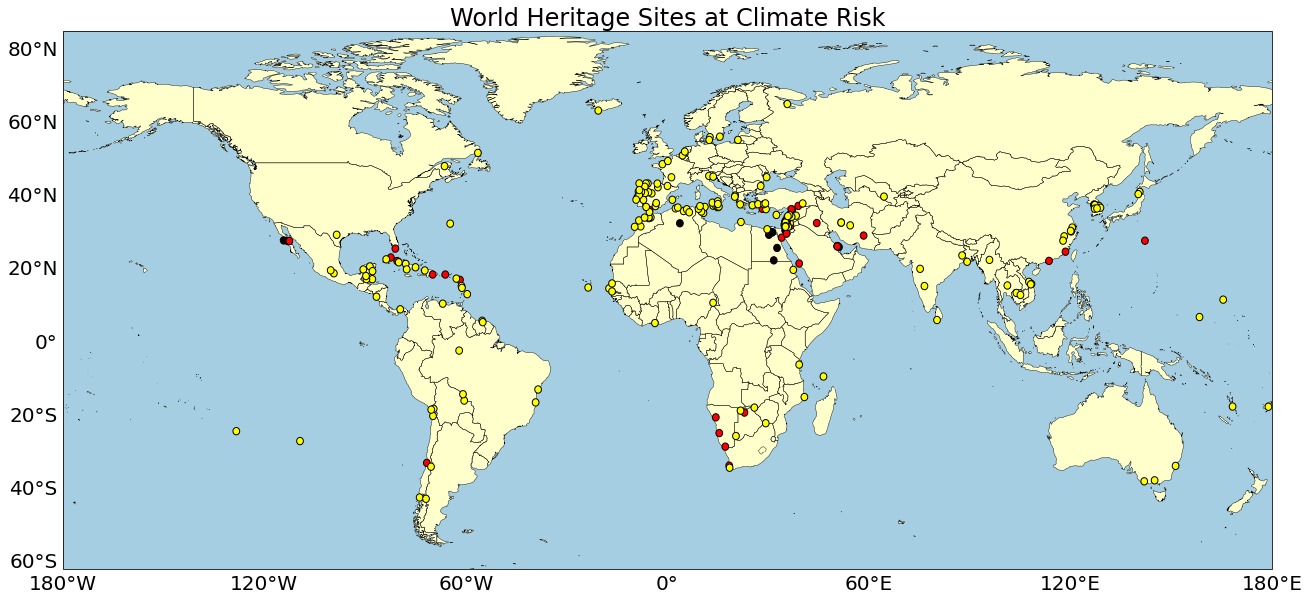

1, 0.0, 303.10000610351557


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Path.I      :Path   [Longitude,Latitude]
   .Polygons.II :Polygons   [Longitude,Latitude]   (Days above 35°C, 2040-2059, SSP2-4.5)
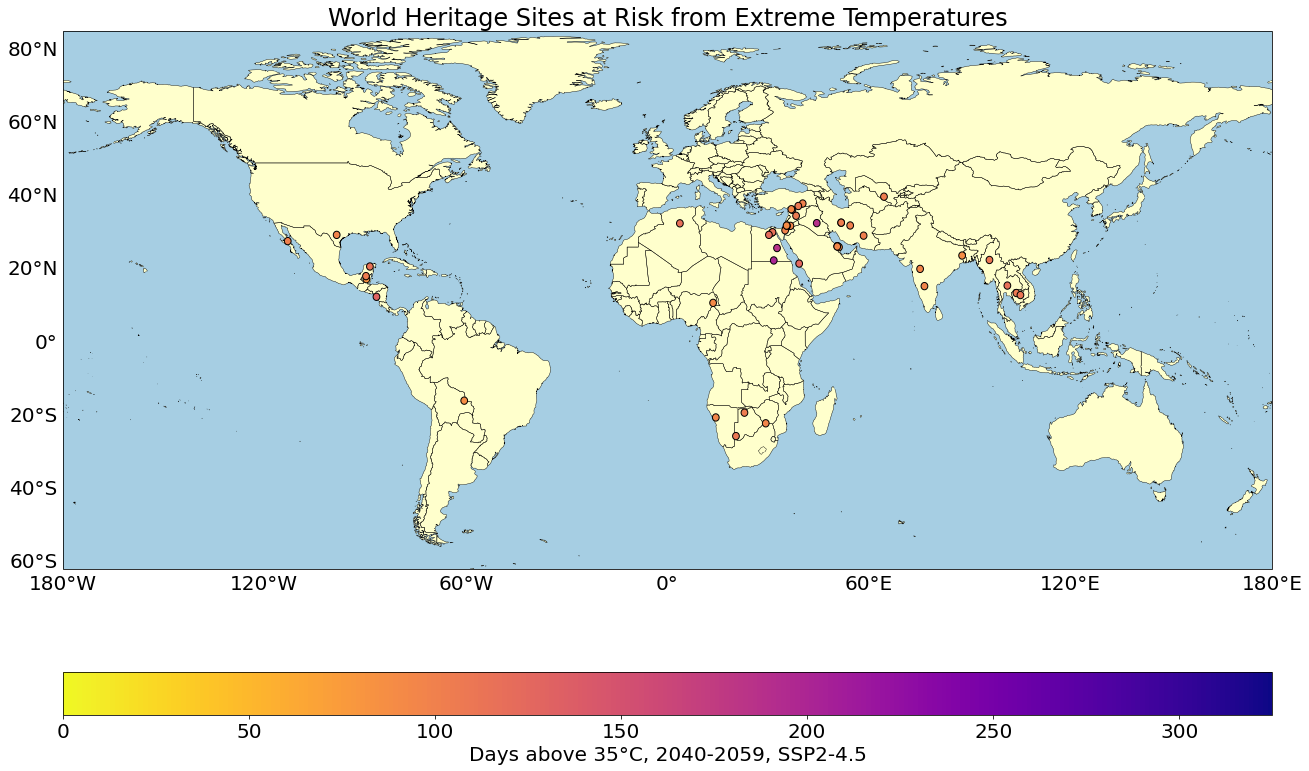

2, 0.9225766062736511, 45.22420883178711


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Path.I      :Path   [Longitude,Latitude]
   .Polygons.II :Polygons   [Longitude,Latitude]   (1 day maximum rainfall as % of annual, 2040-2059, SSP2-4.5)
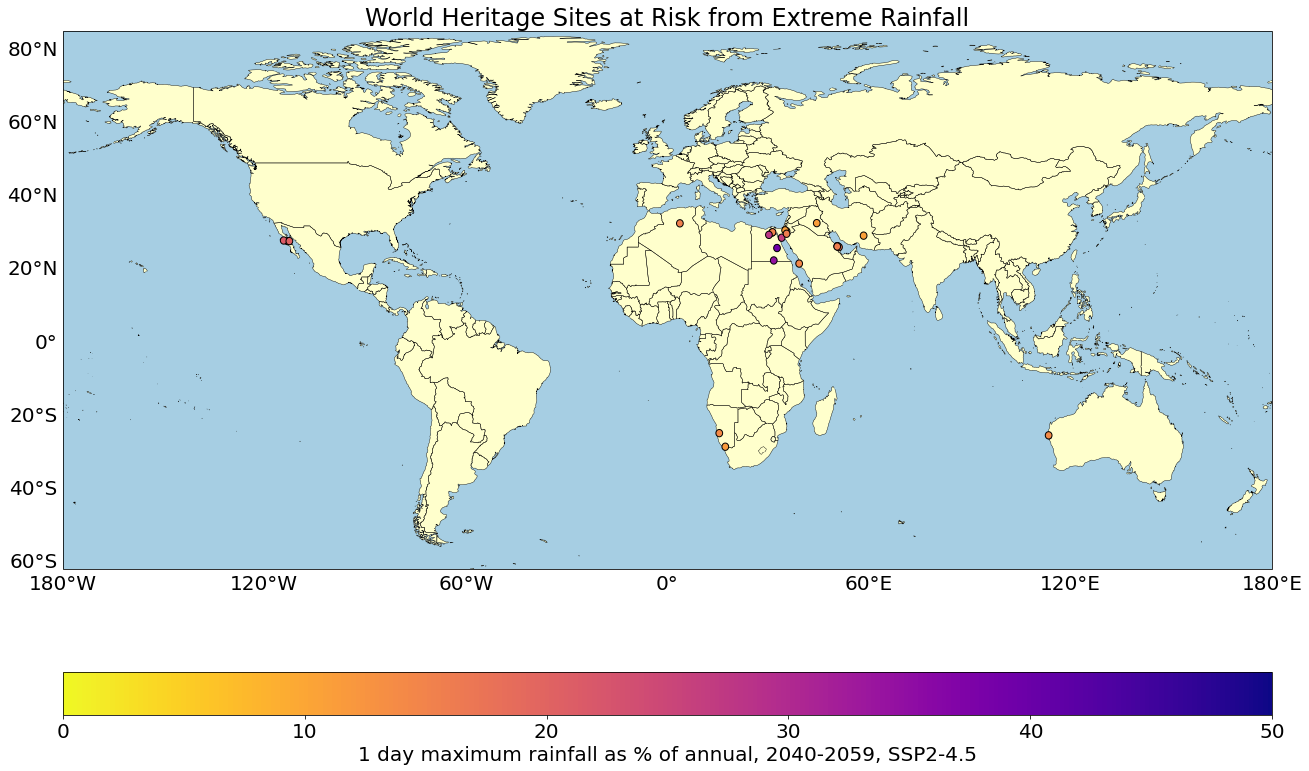

3, 0.0, 469.71234130859375


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Path.I      :Path   [Longitude,Latitude]
   .Polygons.II :Polygons   [Longitude,Latitude]   (100-year hurricane wind, 2040-2059, SSP2-4.5)
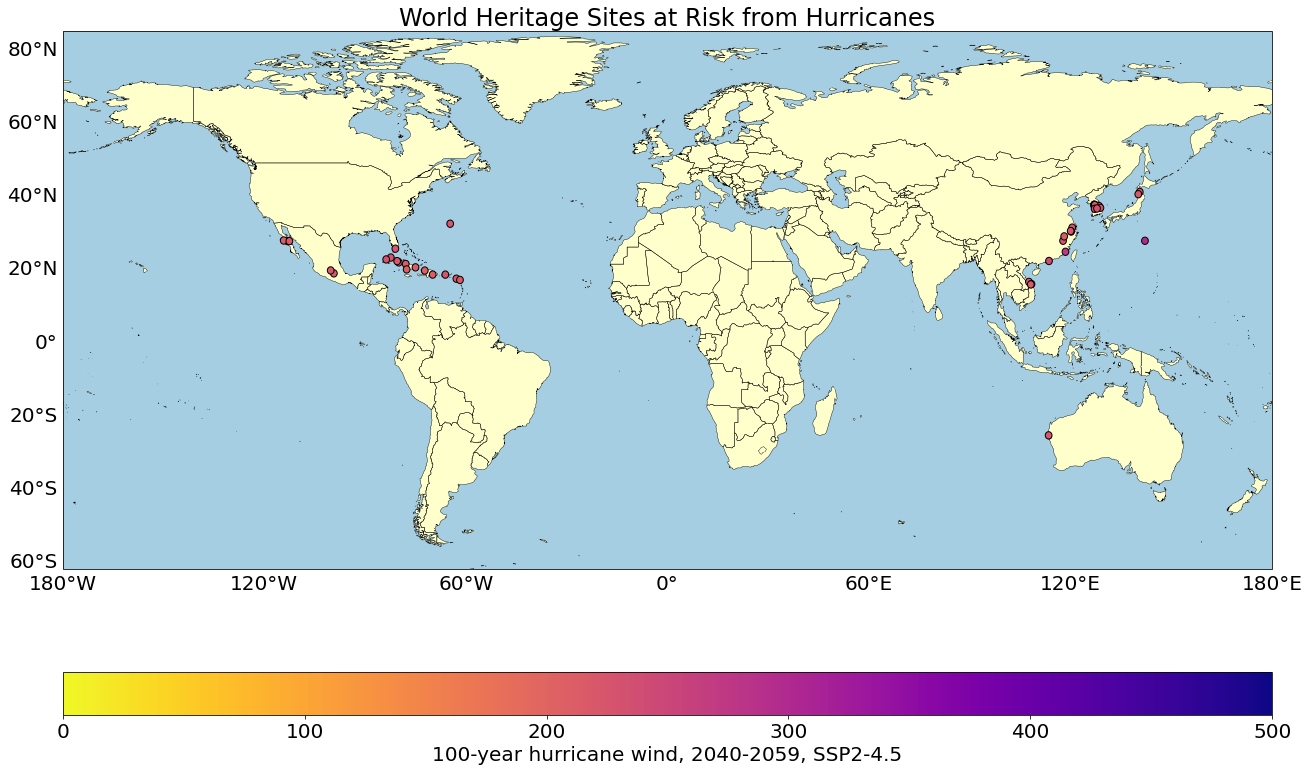

:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Path.I      :Path   [Longitude,Latitude]
   .Polygons.II :Polygons   [Longitude,Latitude]   (danger)
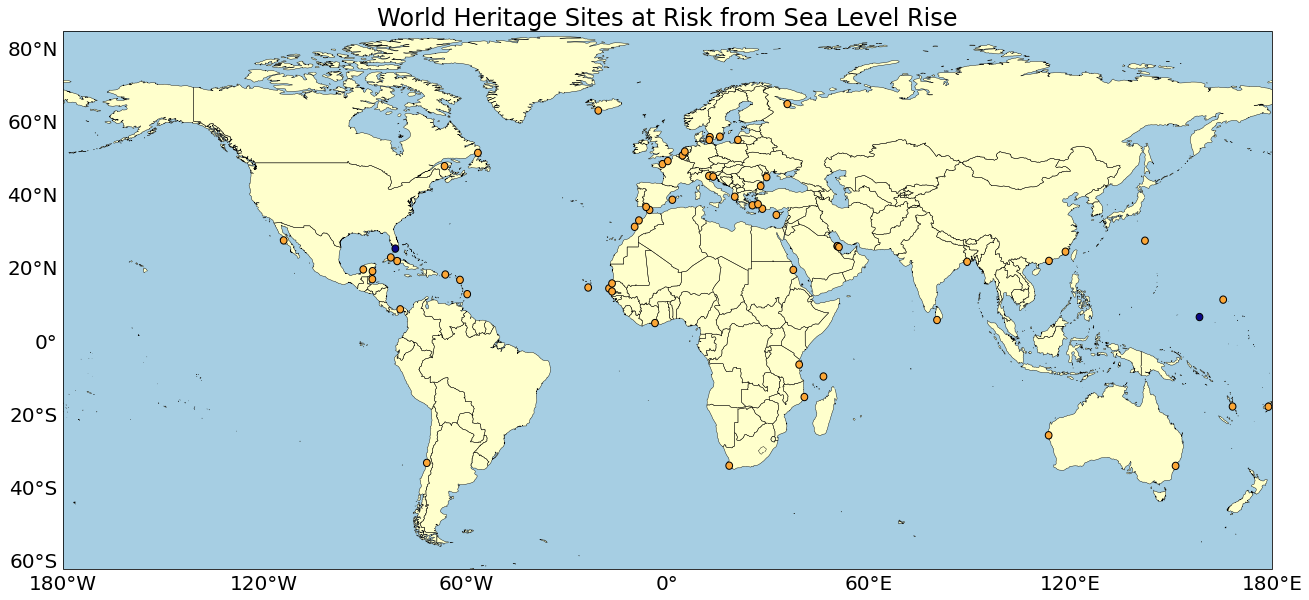

:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Path.I      :Path   [Longitude,Latitude]
   .Polygons.II :Polygons   [Longitude,Latitude]   (danger)
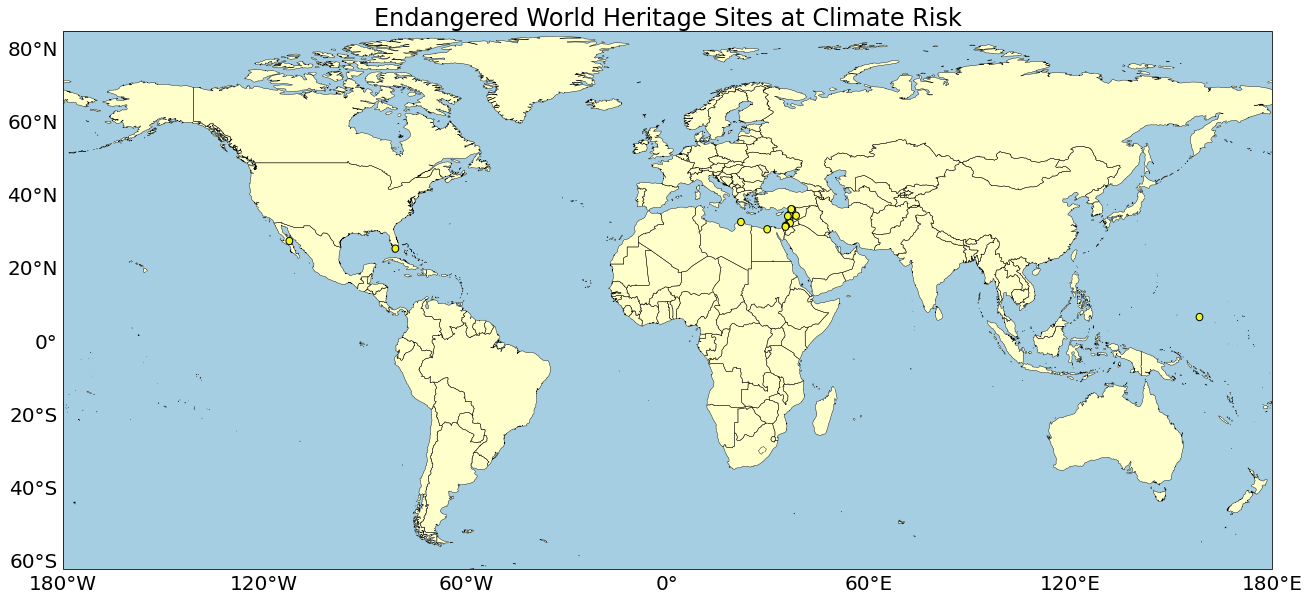

In [ ]:
clim = pd.concat([cultural, natural, mixed])
count_1 = clim[clim["Count"] == 1]
map_1 = gv.Polygons( count_1, vdims = "Count",
    label = "Site exposed to 1 kind of climate risk"
    ).options(cmap = "autumn_r")
count_2 = clim[clim["Count"] == 2]
map_2 = gv.Polygons( count_2, vdims = "Count",
    label = "Site exposed to 2 kinds of climate risk"
    ).options(cmap = "autumn")
count_3 = clim[clim["Count"] == 3]
map_3 = gv.Polygons( count_3, vdims = "Count",
    label = "Site exposed to 3 kinds of climate risk"
    ).options(cmap = "hot")
map = ( ocean * countries * map_3 * map_2 * map_1 ).opts( show_legend = True,
    title = "World Heritage Sites at Climate Risk", **options_m )
gv.output( map, size = 600 )

i = 1
print(f"{i}, {df[cat_col_f[i][0]].min()}, {df[cat_col_f[i][0]].max()}")
min_v, max_v = 0, 325
clim = pd.concat( [ cultural[cultural[cat_col_f[i][1]]],
    mixed[mixed[cat_col_f[i][1]]], natural[natural[cat_col_f[i][1]]] ] )
map_clim = gv.Polygons( clim, vdims = gv.Dimension( cat_col_f[i][0],
    range = ( min_v, max_v ) ) ).opts( cmap = "plasma_r", **options )
map = ( ocean * countries * map_clim ).opts(
    title = "World Heritage Sites at Risk from Extreme Temperatures",
    **options_m )
gv.output( map, size = 600 )

i = 2
print(f"{i}, {df[cat_col_f[i][0]].min()}, {df[cat_col_f[i][0]].max()}")
min_v, max_v = 0, 50
clim = pd.concat( [ cultural[cultural[cat_col_f[i][1]]],
    mixed[mixed[cat_col_f[i][1]]], natural[natural[cat_col_f[i][1]]] ] )
map_clim = gv.Polygons( clim, vdims = gv.Dimension( cat_col_f[i][0],
    range = ( min_v, max_v ) ) ).opts( cmap = "plasma_r", **options )
map = ( ocean * countries * map_clim ).opts(
    title = "World Heritage Sites at Risk from Extreme Rainfall",
    **options_m )
gv.output( map, size = 600 )

i = 3
print(f"{i}, {df[cat_col_f[i][0]].min()}, {df[cat_col_f[i][0]].max()}")
min_v, max_v = 0, 500
clim = pd.concat( [ cultural[cultural[cat_col_f[i][1]]],
    mixed[mixed[cat_col_f[i][1]]], natural[natural[cat_col_f[i][1]]] ] )
map_clim = gv.Polygons( clim, vdims = gv.Dimension( cat_col_f[i][0],
    range = ( min_v, max_v ) ) ).opts( cmap = "plasma_r", **options )
map = ( ocean * countries * map_clim ).opts(
    title = "World Heritage Sites at Risk from Hurricanes",
    **options_m )
gv.output( map, size = 600 )

min_v, max_v = -0.25, 1
clim = pd.concat( [ cultural[cultural[cat_sl[1]]],
    mixed[mixed[cat_sl[1]]], natural[natural[cat_sl[1]]] ] )
map_clim = gv.Polygons( clim, vdims = gv.Dimension( "danger",
    range = ( min_v, max_v ) ) ).opts( cmap = "plasma_r",
    ylim = (-62,85), xlim = (-180,180) )
map = ( ocean * countries * map_clim ).opts(
    title = "World Heritage Sites at Risk from Sea Level Rise",
    **options_m )
gv.output( map, size = 600 )

danger = pd.concat( [ cultural[cultural["danger"]==1],
    mixed[mixed["danger"]==1], natural[natural["danger"]==1] ] )
map_danger = gv.Polygons( danger, vdims = "danger"
    ).opts( color = "brown", cmap = "plasma_r",
    ylim = (-62,85), xlim = (-180,180) )
map = ( ocean * countries * map_danger ).opts(
    title = "Endangered World Heritage Sites at Climate Risk",
    **options_m )
gv.output( map, size = 600 )